In [1]:
from collections import Counter

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

from nltk import word_tokenize
from tqdm.auto import tqdm

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/savchart/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Load the CSV file into a DataFrame
df = pd.read_csv('../data/questions_and_answers.csv')

df = df.dropna(subset=['Question Text', 'Answer Text'])
df = df.drop_duplicates(subset=['Question Text', 'Answer Text'])
df = df.reset_index(drop=True)

df['Question Title'] = df['Question Title'].str.replace(r'\r\n|\n|\r', ' ', regex=True)
df['Question Text'] = df['Question Text'].str.replace(r'\r\n|\n|\r', ' ', regex=True)
df['Answer Text'] = df['Answer Text'].str.replace(r'\r\n|\n|\r', ' ', regex=True)

df['Question Text'] = df['Question Text'].str.strip()
df['Answer Text'] = df['Answer Text'].str.strip()

df['Question Date'] = df['Question Date'].str.replace(r'\d+\.\d+\.-0001 \d+:\d+', 'NaN')
df['Question Date'] = df['Question Date'].ffill()
df['Question Date'] = pd.to_datetime(df['Question Date'], format='%d.%m.%Y %H:%M')
df['Year'] = df['Question Date'].dt.year

In [11]:
from sklearn.model_selection import train_test_split
train, test_val = train_test_split(df, test_size=0.4, stratify=df['Section'], random_state=42)
test, val = train_test_split(test_val, test_size=0.5, stratify=test_val['Section'], random_state=42)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
val = val.reset_index(drop=True)

train.to_csv('../data/dataset/train.csv', index=False)
test.to_csv('../data/dataset/test.csv', index=False)
val.to_csv('../data/dataset/val.csv', index=False)

In [4]:
df['Question Text'][0]

'Dobrý den, Pracuji v Rakousku na smlouvu 9h týdně za 483€ měsíčně. Zdravotní a sociální si platím v Česku. Sociální jsem začala platit později od Ledna 2022. Chtěla jsem se zeptat jestli budu mít nárok aspoň na rodičovský příspěvek? A pokud Ano bude potom zdravotní a sociální za mě odvádět stát? Nebo jak to funguje. Děkuji za odpověď.'

In [5]:
df['Answer Text'][0]

'Dobrý den, nárok na rodičovský příspěvek máte, jestliže máte trvalý pobyt a bydliště na území České republiky. Zdravotní pojištění za vás hradní stát, sociální pojištění stát neodvádí, ale vůči důchodu se rodičovská dovolená bere jako  náhradní doba pojištění (viz. https://www.finance.cz/519065-nahradni-doba-pojisteni/?_fid=swa4). O rodičovský příspěvek si musíte zažádat - https://www.mpsv.cz/-/rodicovsky-prispevek. Hezký den.'

In [24]:
df.tail()

,Section,Theme,Question Date,Question Title,Question Text,QA Link,Responder Name,Answer Date,Answer Text,Date,Year
62097,Daně,Daň z příjmu FO,30.10.2001 10:33,Prosím o laskavé sdělení. Letos jsem prodal auto…,Prosím o laskavé sdělení. Letos jsem prodal a...,/dane/6142-dotaz-v-poradenstvi/,Redakce,NaN,Pokud byl automobil zahrnutý v obchodním majet...,2001-10-30 10:33:00,2001
62098,Pojištění,Životní pojištění,03.02.2000 00:00,rad bych se pojistil na důchod a proti invalid...,rad bych se pojistil na důchod a proti invalid...,/pojisteni/511-dotaz-v-poradenstvi/,Redakce,NaN,"Pokud budet chtít, lze Vám zpracovat na základ...",2000-02-03 00:00:00,2000
62099,Daně,Daň z příjmu FO,06.04.2000 00:00,"Jako právnická osoba ""Sdružení občanů obytného…","Jako právnická osoba ""Sdružení občanů obytného...",/dane/1535-dotaz-v-poradenstvi/,Redakce,NaN,Podle našeho názoru jsou tyto příspěvky od dan...,2000-04-06 00:00:00,2000
62100,Daně,Daň z příjmu FO,19.09.2000 00:00,Vážení chci využít možnosti odečtu části…,Vážení chci využít možnosti odečtu části přís...,/dane/2559-dotaz-v-poradenstvi/,Redakce,NaN,"Můžete si uplatnit odpočet v plné výši, pokud ...",2000-09-19 00:00:00,2000
62101,Daně,Daň z příjmu FO,17.10.2000 00:00,Naše firma spolupracuje s daňovým poradcem.…,Naše firma spolupracuje s daňovým poradcem. Za...,/dane/2815-dotaz-v-poradenstvi/,Redakce,NaN,Bohužel jste vaši firmu specifikovali pouze po...,2000-10-17 00:00:00,2000


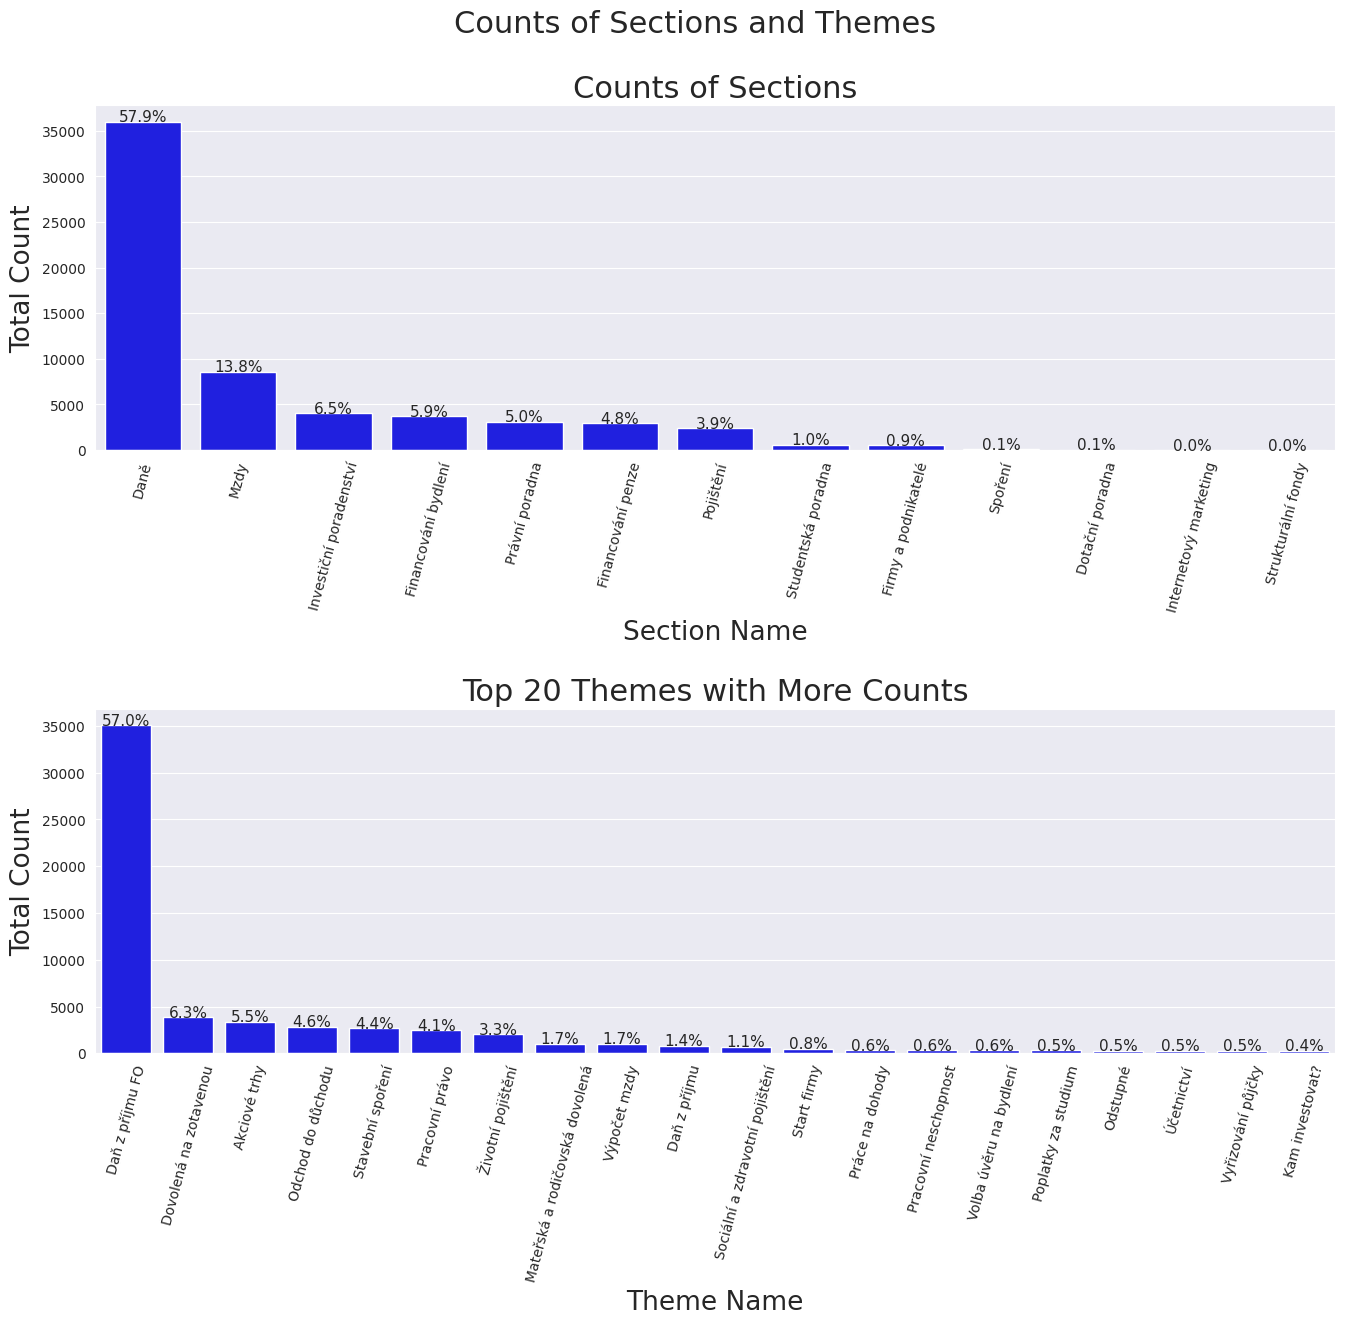

In [5]:
plt.figure(figsize=(16, 12))
plt.suptitle('Counts of Sections and Themes', size=22)

# Plot for Section counts
plt.subplot(211)
section_counts = df['Section'].value_counts()
g0 = sns.barplot(x=section_counts.index, y=section_counts.values, color='blue')
g0.set_title("Counts of Sections", fontsize=22)
g0.set_xlabel("Section Name", fontsize=19)
g0.set_ylabel("Total Count", fontsize=19)
g0.set_xticks(range(len(section_counts)))  # Set the ticks explicitly
g0.set_xticklabels(section_counts.index, rotation=75)  # Remove rotation from tick labels
for p in g0.patches:
    height = p.get_height()
    g0.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.1f}%'.format(height / section_counts.sum() * 100),
            ha="center", fontsize=11)

# Plot for Theme counts
plt.subplot(212)
theme_counts = df['Theme'].value_counts()
g1 = sns.barplot(x=theme_counts.index[:20], y=theme_counts.values[:20], color='blue')
g1.set_title("Top 20 Themes with More Counts", fontsize=22)
g1.set_xlabel("Theme Name", fontsize=19)
g1.set_ylabel("Total Count", fontsize=19)
g1.set_xticks(range(len(theme_counts[:20])))  # Set the ticks explicitly
g1.set_xticklabels(theme_counts.index[:20], rotation=75)  # Remove rotation from tick labels
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.1f}%'.format(height / theme_counts.sum() * 100),
            ha="center", fontsize=11)

plt.subplots_adjust(hspace=0.75, top=0.90)  # Increase space between subplots

plt.show()

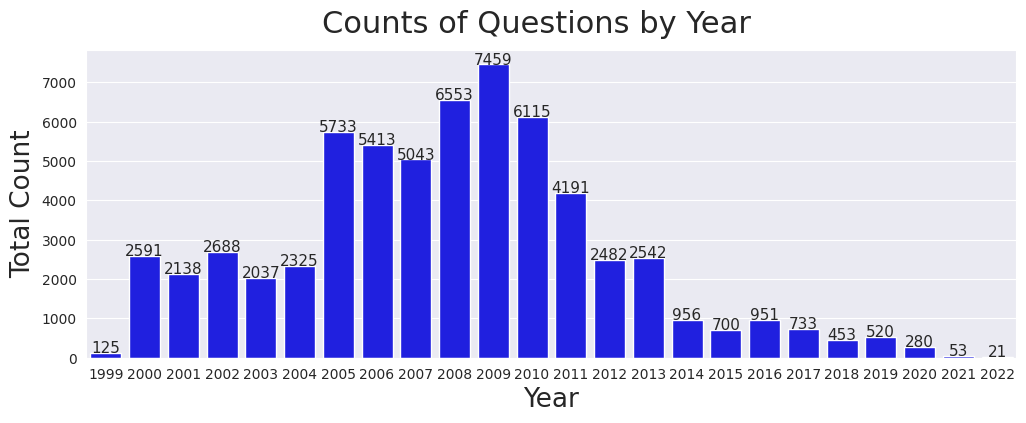

In [6]:
plt.figure(figsize=(12, 4))
plt.suptitle('Counts of Questions by Year', size=22)
question_count_by_year = df['Year'].value_counts().sort_index()
g0 = sns.barplot(x=question_count_by_year.index, y=question_count_by_year.values, color='blue')
g0.set_xlabel("Year", fontsize=19)
g0.set_ylabel("Total Count", fontsize=19)
for p in g0.patches:
    height = p.get_height()
    g0.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center", fontsize=11)

plt.show()

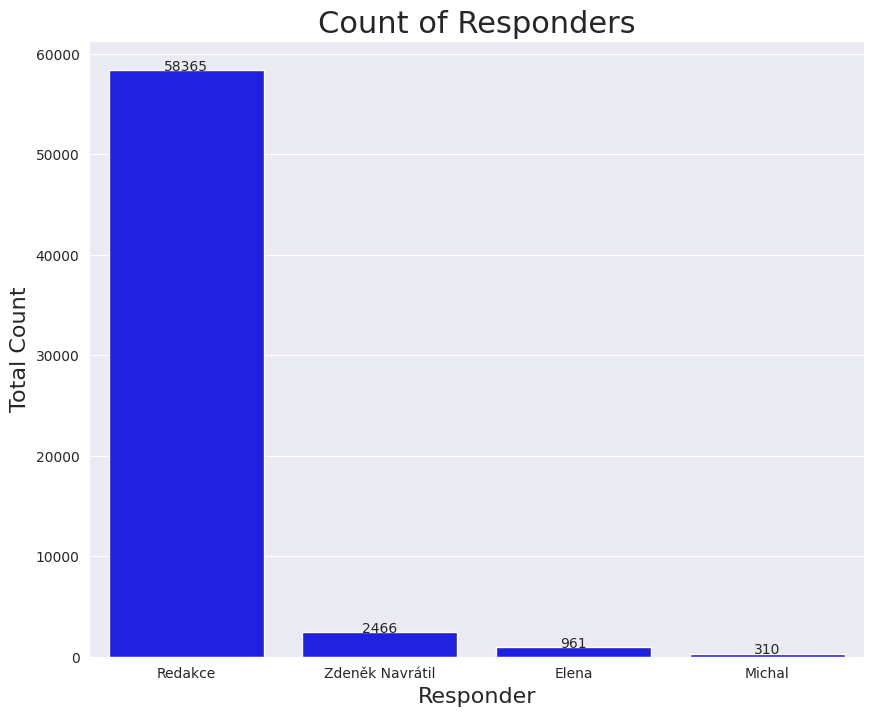

In [7]:
plt.figure(figsize=(10, 8))
plt.title('Count of Responders', size=22)

responder_counts = df["Responder Name"].value_counts()

g = sns.barplot(x=responder_counts.index, y=responder_counts.values, color='blue')
g.set_xlabel("Responder", fontsize=16)
g.set_ylabel("Total Count", fontsize=16)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x() + p.get_width() / 2.,
           height + 3,
           '{:1.0f}'.format(height),
           ha="center", fontsize=10)

plt.show()


In [8]:
question_tokens = [word_tokenize(question) for question in tqdm(df['Question Text'])]
len_question_tokens = [len(tokens) for tokens in question_tokens]
df['Question Length'] = len_question_tokens

  0%|          | 0/62102 [00:00<?, ?it/s]

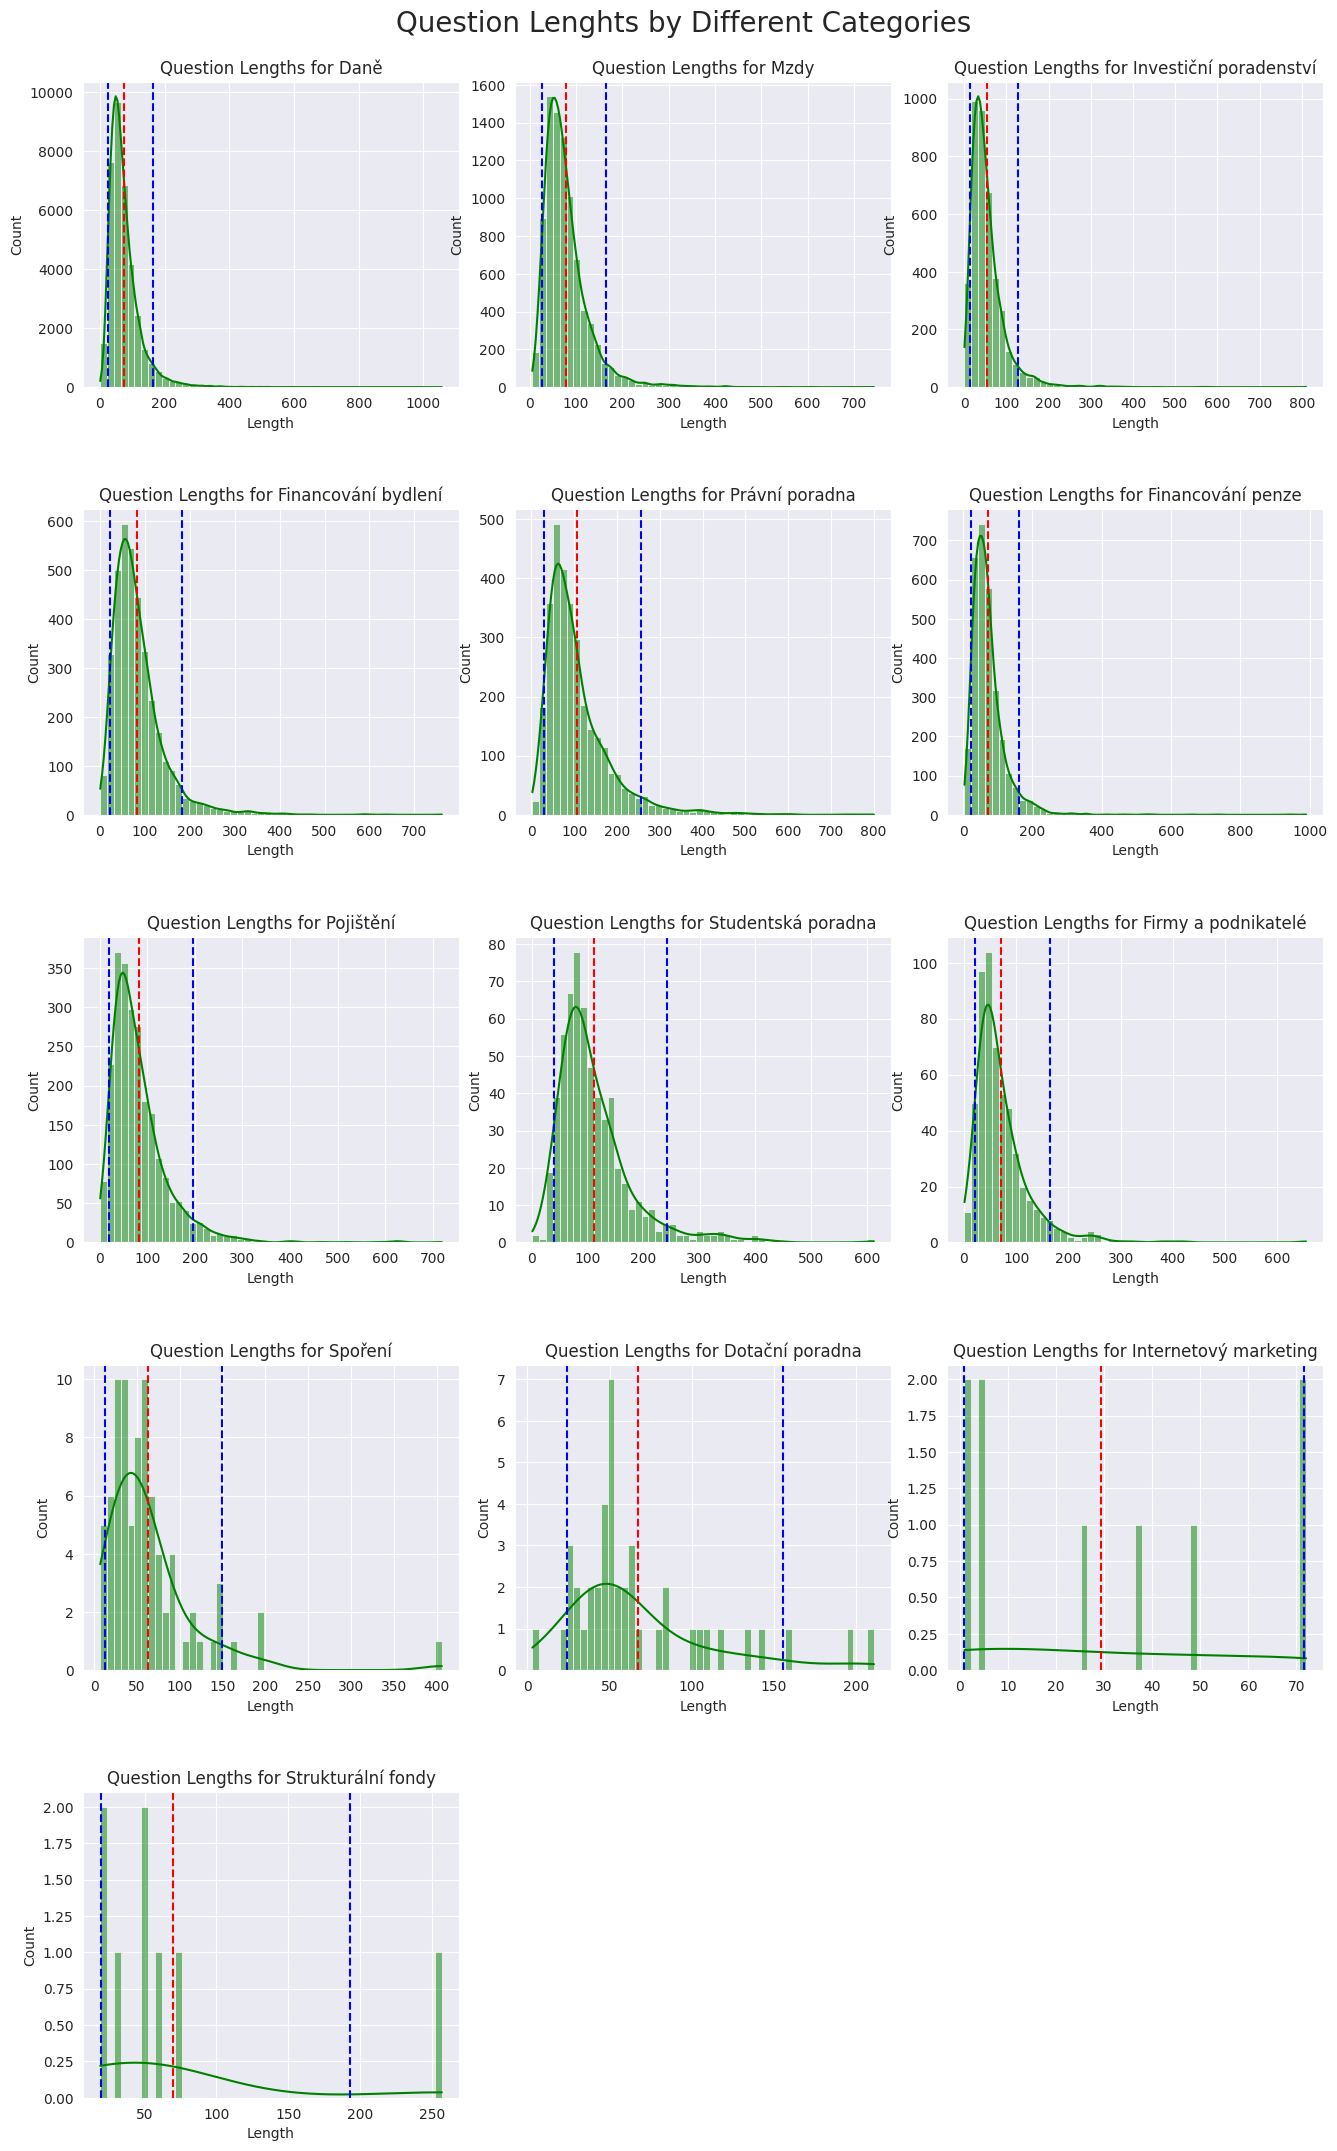

In [9]:
grid = gridspec.GridSpec(5, 3)
plt.figure(figsize=(16, 6 * 4))

plt.suptitle('Question Lenghts by Different Categories', size=20)
count = 0
top_cats = df['Section'].value_counts().index
for n, col in enumerate(top_cats):
    plt.subplot(grid[n])
    sns.histplot(df[df['Section'] == col]['Question Length'], bins=50, color='green', kde=True)
    plt.axvline(df[df['Section'] == col]['Question Length'].mean(), color='red', linestyle='--')
    plt.axvline(df[df['Section'] == col]['Question Length'].quantile(0.05), color='blue', linestyle='--')
    plt.axvline(df[df['Section'] == col]['Question Length'].quantile(0.95), color='blue', linestyle='--')
    plt.title(f'Question Lengths for {col}', size=12)
    plt.xlabel('Length', size=10)
    plt.ylabel('Count', size=10)
    count += 1

plt.subplots_adjust(top=0.95, hspace=.4, wspace=.15)
plt.show()

In [10]:
answer_tokens = [word_tokenize(answer) for answer in tqdm(df['Answer Text'])]
len_answer_tokens = [len(tokens) for tokens in answer_tokens]
df['Answer Length'] = len_answer_tokens

  0%|          | 0/62102 [00:00<?, ?it/s]

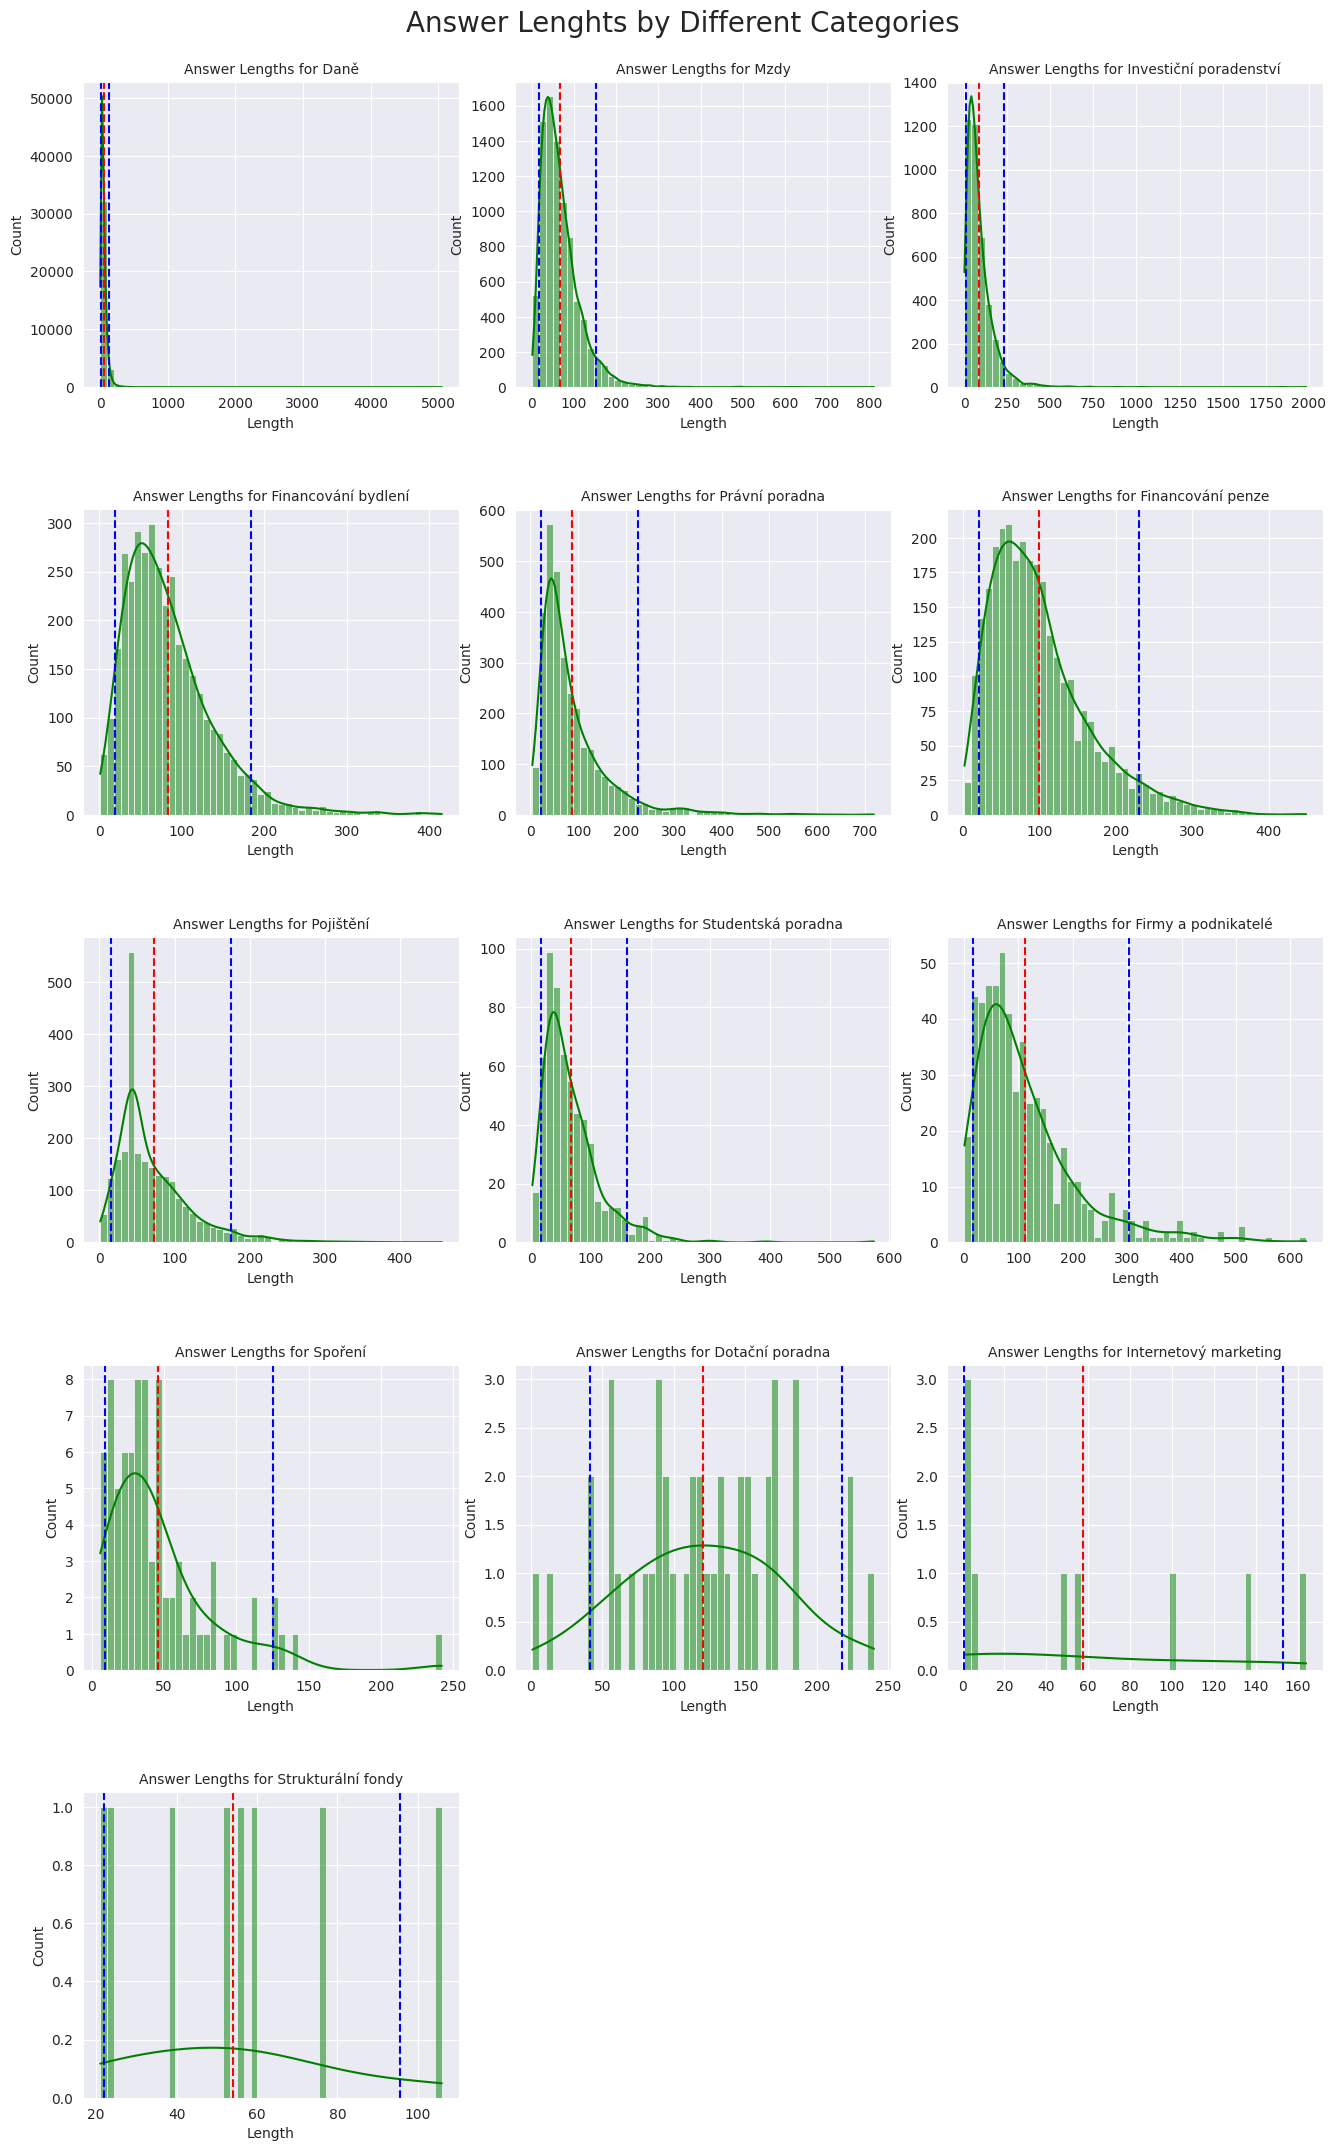

In [11]:
grid = gridspec.GridSpec(5, 3)
plt.figure(figsize=(16, 6 * 4))

plt.suptitle('Answer Lenghts by Different Categories', size=20)
count = 0
top_cats = df['Section'].value_counts().index
for n, col in enumerate(top_cats):
    plt.subplot(grid[n])
    sns.histplot(df[df['Section'] == col]['Answer Length'], bins=50, color='green', kde=True)
    plt.axvline(df[df['Section'] == col]['Answer Length'].mean(), color='red', linestyle='--')
    plt.axvline(df[df['Section'] == col]['Answer Length'].quantile(0.05), color='blue', linestyle='--')
    plt.axvline(df[df['Section'] == col]['Answer Length'].quantile(0.95), color='blue', linestyle='--')
    plt.title(f'Answer Lengths for {col}', size=10)
    plt.xlabel('Length', size=10)
    plt.ylabel('Count', size=10)
    count += 1
    
plt.subplots_adjust(top=0.95, hspace=.4, wspace=.15)
plt.show()

In [12]:
stop_words = ['a', 'aby', 'aj', 'ak', 'ako', 'ale', 'alebo', 'and', 'ani', 'áno', 'asi', 'až', 'bez', 'bol', 'bola', 'boli', 'bolo', 'by', 'bol', 'bola', 'boli', 'bolo', 'by', 'byť', 'cez', 'čo', 'či', 'ďalší', 'ďalšia', 'ďalšie', 'dnes', 'do', 'ho', 'hoci', 'i', 'iba', 'iné', 'iný', 'ja', 'je', 'jeho', 'jsem', 'jej', 'ju', 'k', 'kam', 'každý', 'každá', 'každé', 'každí', 'kde', 'keď', 'kto', 'ktorá', 'ktoré', 'ktorou', 'ktorý', 'ktorí', 'ku', 'lebo', 'len', 'ma', 'mať', 'má', 'máte', 'medzi', 'mi', 'mna', 'mne', 'mnou', 'musieť', 'môcť', 'môj', 'môže', 'my', 'na', 'nad', 'nám', 'náš', 'naši', 'ne', 'neho', 'nej', 'nemu', 'nich', 'nie', 'nič', 'niektorý', 'niektorá', 'niektoré', 'niektorí', 'nielen', 'nim', 'nimi', 'nič', 'no', 'o', 'od', 'odo', 'on', 'ona', 'ono', 'oni', 'ono', 'ony', 'po', 'pod', 'podľa', 'pokiaľ', 'potom', 'práve', 'pre', 'prečo', 'pred', 'predo', 'preto', 'pretože', 'prvý', 'prvá', 'prvé', 'prví', 's', 'sa', 'so', 'si', 'se', 'svoj', 'svoje', 'svojich', 'svojím', 'svojími', 'ta', 'tak', 'takže', 'taký', 'taká', 'také', 'takí', 'tam', 'te', 'teba', 'tebe', 'tebou', 'teda', 'ten', 'tento', 'tieto', 'tiež', 'to', 'toto', 'toho', 'tohoto', 'tom', 'tomto', 'tomuto', 'tu', 'tú', 'tvoj', 'tvojími', 'ty', 'tý', 'tým', 'tými', 'už', 'v', 'vám', 'váš', 'vaši', 'veľmi', 'viac', 'vo', 'voči', 'však', 'všetok', 'vy', 'z', 'za', 'zo', 'že', 'den', 'dobrý', 'děkuji', 'bych', 'nebo', 'jak', 'jako', 'u', 'pro', 'tak', 'mít', 'ale', 'tak', 'jsem', 'když', 'zda']

In [13]:
top_words_questions = {}
for section in tqdm(df['Section'].value_counts().index):
    words = [word for question in df[df['Section'] == section]['Question Text'] for word in word_tokenize(question) if word.isalpha() and word.lower() not in stop_words]
    top_words_questions[section] = Counter(words).most_common(10)

  0%|          | 0/13 [00:00<?, ?it/s]

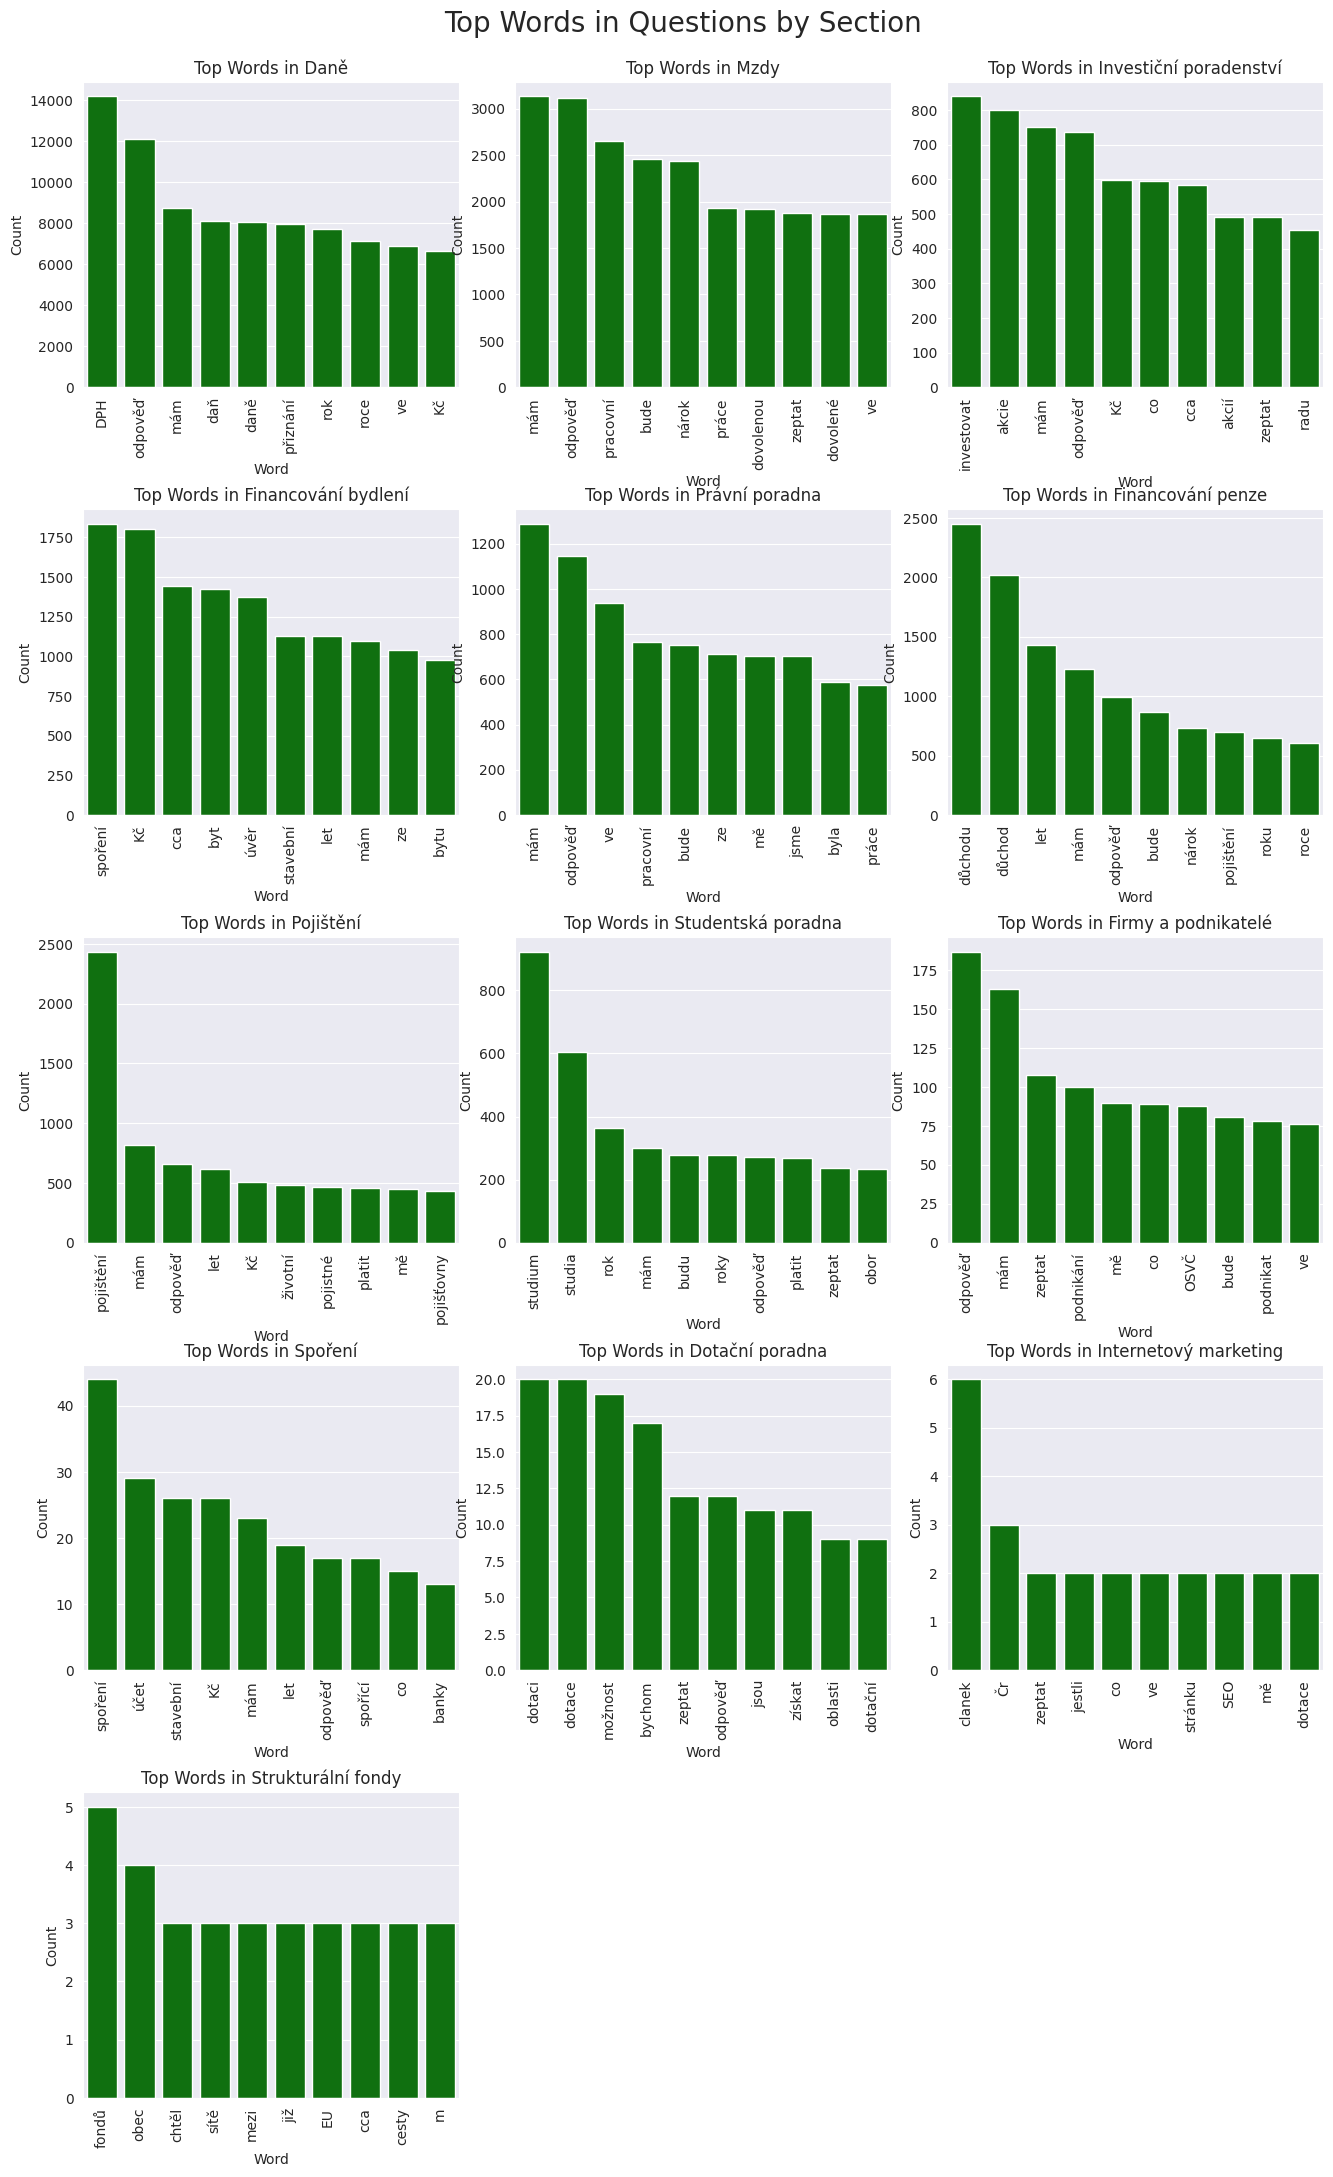

In [14]:
plt.figure(figsize=(16, 6 * 4))
plt.suptitle('Top Words in Questions by Section', size=20)
count = 0
for section, words in top_words_questions.items():
    plt.subplot(grid[count])
    sns.barplot(x=[word[0] for word in words], y=[word[1] for word in words], color='green')
    plt.title(f'Top Words in {section}', size=12)
    plt.xlabel('Word', size=10)
    plt.ylabel('Count', size=10)
    plt.xticks(rotation=90)
    count += 1
    
plt.subplots_adjust(top=0.95, hspace=.4, wspace=.15)
plt.show()

In [15]:
top_words_answers = {}

for section in tqdm(df['Section'].value_counts().index):
    words = [word for answer in df[df['Section'] == section]['Answer Text'] for word in word_tokenize(answer) if word.isalpha() and word.lower() not in stop_words]
    top_words_answers[section] = Counter(words).most_common(10)

  0%|          | 0/13 [00:00<?, ?it/s]

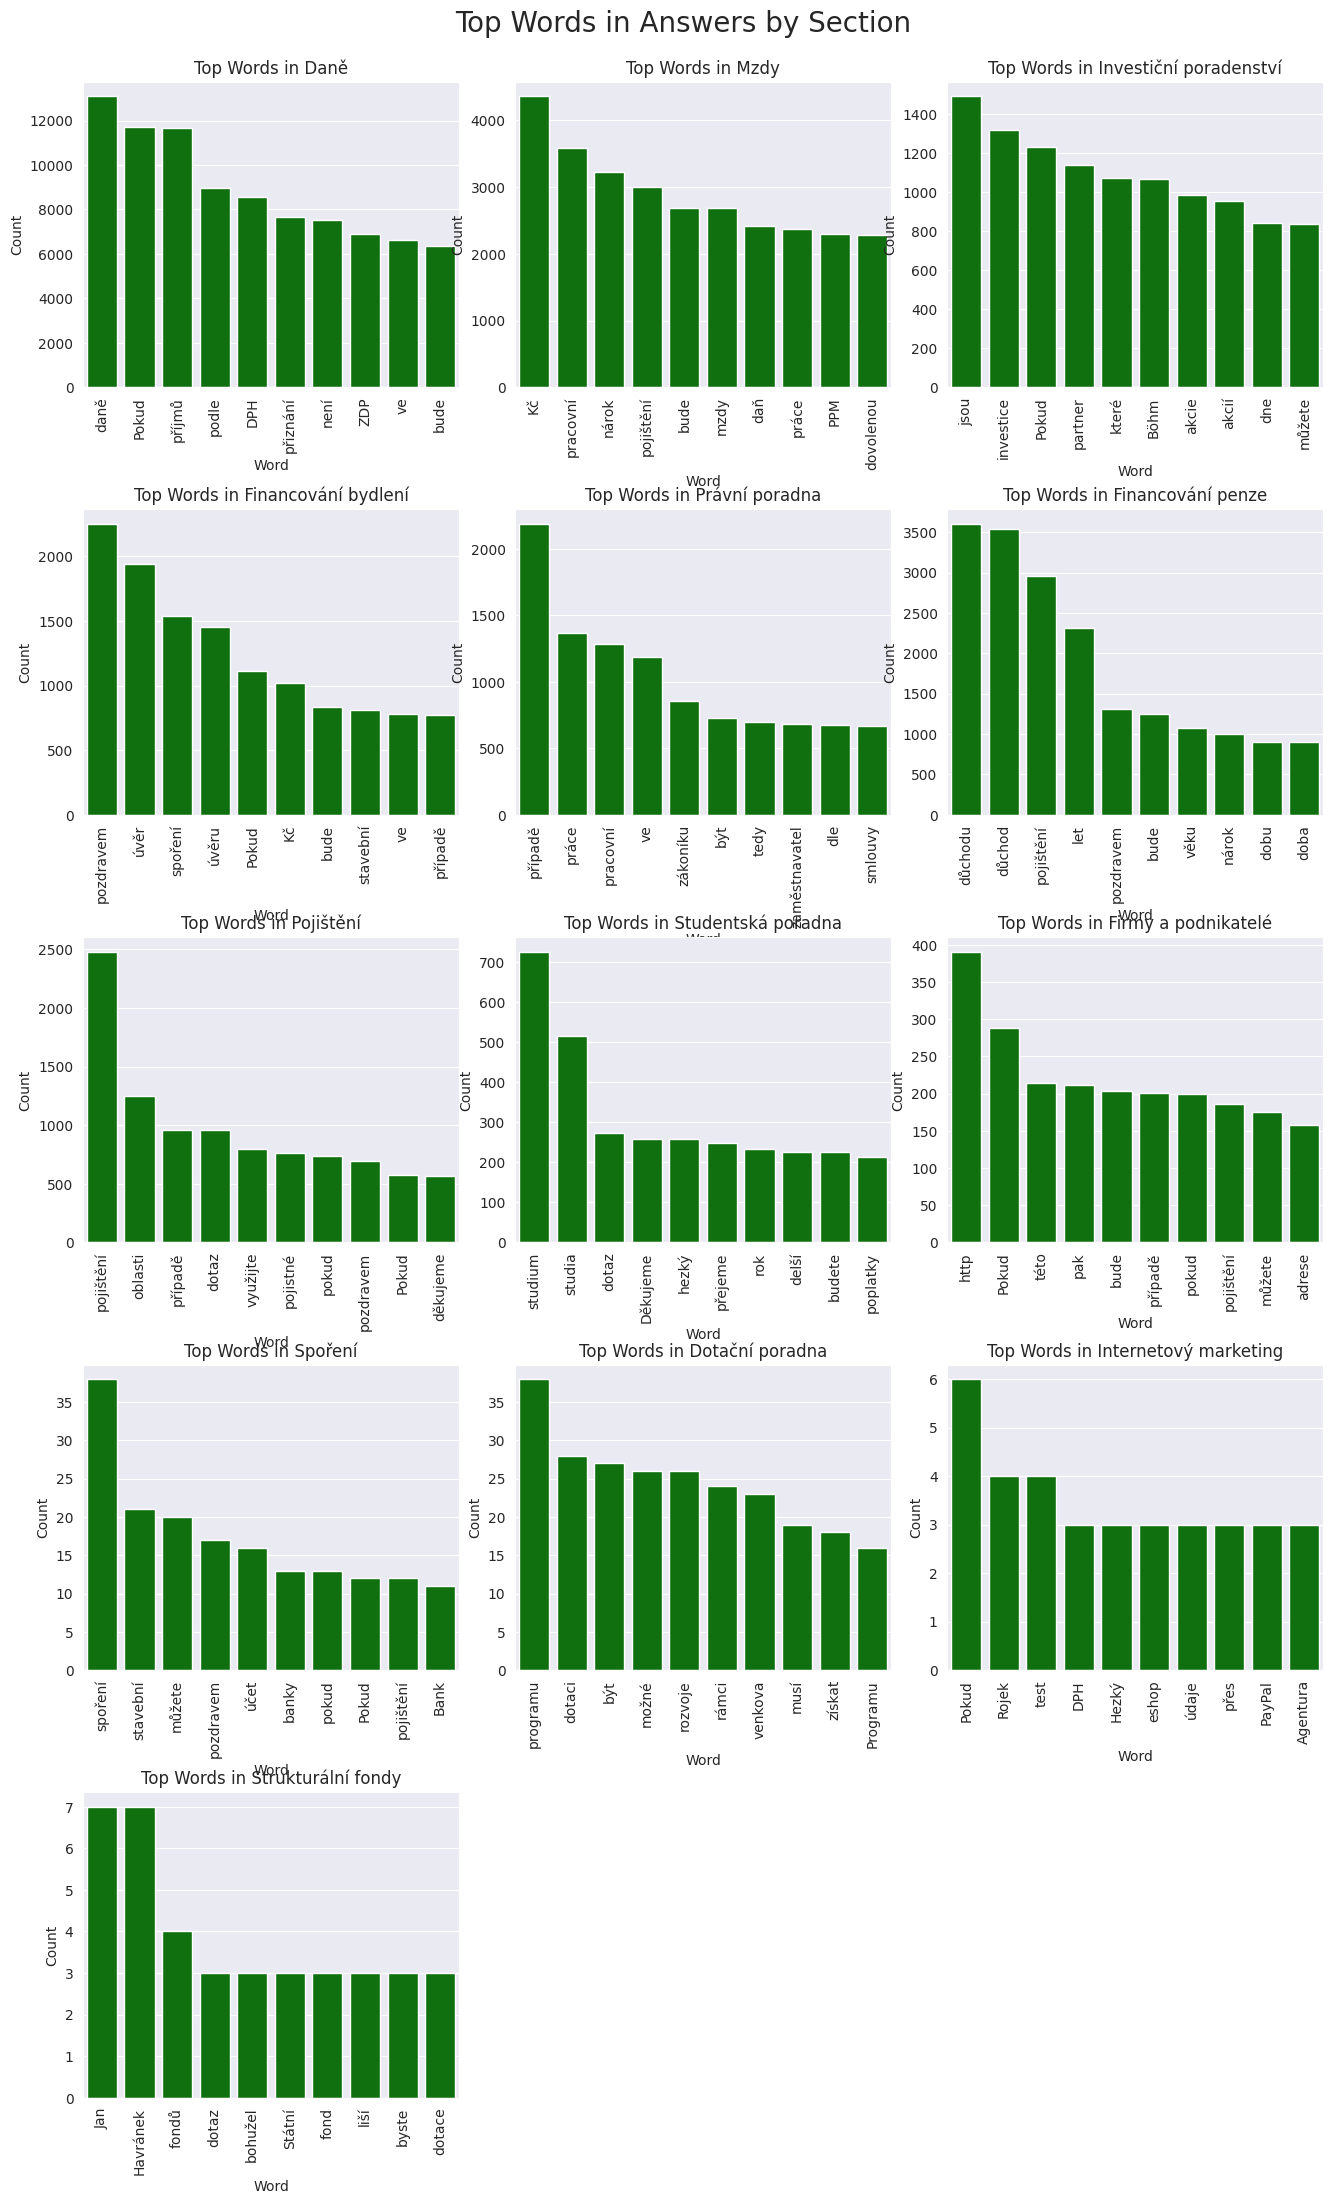

In [16]:
plt.figure(figsize=(16, 6 * 4))
plt.suptitle('Top Words in Answers by Section', size=20)
count = 0
for section, words in top_words_answers.items():
    plt.subplot(grid[count])
    sns.barplot(x=[word[0] for word in words], y=[word[1] for word in words], color='green')
    plt.title(f'Top Words in {section}', size=12)
    plt.xlabel('Word', size=10)
    plt.ylabel('Count', size=10)
    plt.xticks(rotation=90)
    count += 1
    
plt.subplots_adjust(top=0.95, hspace=.4, wspace=.15)
plt.show()